# Naive bayes

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from joblib import dump, load

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

In [3]:
from preprocessing import reemplazarNulls,reemplazarCategoricas,reemplazarFechas,targetBooleano,regularizar,reemplazarCategoricas_OHE,reemplazarCategoricas_HashTrick,reemplazarNullsNum

[###] Initial Preprocessings Done                           
[###] Aditional Preprocessings Done                                                   


In [15]:
from utilities import score, score2, df_feat, df_targ, train_val

### Codigo a correr

In [5]:
MAX_ITER = 10**6
MAX_JOBS = -1

**Run :** Entrenar Nuevamente o Cargar Entrenado

In [6]:
runReg = True
runOhe = True
runHt = True

**Save :** Guardar Modelo (pisa anterior)

In [7]:
saveReg = True
saveOhe = True
saveHt = True
saveBest = True

In [40]:
predictions = pd.DataFrame()

### Preprocesamiento

In [9]:
df_targ=targetBooleano(df_targ)
ohe_feat = reemplazarCategoricas_OHE(df_feat)
ht_feat = reemplazarCategoricas_HashTrick(df_feat)

reemplazarNulls(df_feat , inplace=True)
reemplazarCategoricas(df_feat , inplace=True)
reemplazarFechas(df_feat , inplace=True)

df_feat_r = regularizar(df_feat)

reemplazarNullsNum(ohe_feat, inplace=True)
reemplazarFechas(ohe_feat , inplace=True)

reemplazarNullsNum(ht_feat, inplace=True)
reemplazarFechas(ht_feat , inplace=True)

,horas_de_sol,humedad_tarde,humedad_temprano,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_velocidad,...,missing_rafaga_viento_max_velocidad,missing_temp_max,missing_temp_min,missing_temperatura_tarde,missing_temperatura_temprano,missing_velocidad_viendo_tarde,missing_velocidad_viendo_temprano,y,m,d
id,,,,,,,,,,,,,,,,,,,,,
74816,7.629393,78.0,74.0,5.470542,68.0,4.50597,4.430203,1024.200000,1026.200000,48.0,...,False,False,False,False,False,False,False,2014,6,7
64318,7.629393,14.0,56.0,5.470542,5.8,1.00000,4.430203,998.300000,1002.500000,61.0,...,False,False,False,False,False,False,False,2014,12,7
54357,2.600000,79.0,47.0,5.470542,0.0,8.00000,7.000000,1000.500000,1005.800000,57.0,...,False,False,False,False,False,False,False,2010,7,8
1762,0.000000,92.0,96.0,3.000000,5.0,8.00000,8.000000,1015.400000,1016.800000,54.0,...,False,False,False,False,False,False,False,2015,11,4
89422,7.629393,14.0,37.0,5.470542,0.0,2.00000,4.430203,1006.400000,1011.100000,50.0,...,False,False,False,False,False,False,False,2014,12,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49272,6.500000,63.0,44.0,3.800000,0.4,6.00000,2.000000,1011.800000,1014.500000,72.0,...,False,False,False,False,False,False,False,2012,5,23
13885,2.100000,65.0,80.0,1.600000,5.2,7.00000,7.000000,1017.500000,1016.300000,48.0,...,False,False,False,False,False,False,False,2011,10,25
4586,7.629393,81.0,62.0,5.470542,0.0,4.50597,4.430203,1015.257118,1017.655555,35.0,...,False,False,False,False,False,False,False,2015,12,16


In [10]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102356 entries, 74816 to 32535
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   direccion_viento_tarde        102356 non-null  float64
 1   direccion_viento_temprano     102356 non-null  float64
 2   horas_de_sol                  102356 non-null  float64
 3   humedad_tarde                 102356 non-null  float64
 4   humedad_temprano              102356 non-null  float64
 5   llovieron_hamburguesas_hoy    102356 non-null  bool   
 6   mm_evaporados_agua            102356 non-null  float64
 7   mm_lluvia_dia                 102356 non-null  float64
 8   nubosidad_tarde               102356 non-null  float64
 9   nubosidad_temprano            102356 non-null  float64
 10  presion_atmosferica_tarde     102356 non-null  float64
 11  presion_atmosferica_temprano  102356 non-null  float64
 12  rafaga_viento_max_direccion   102356 non-

In [11]:
train_feat_r, val_feat_r, train_targ_r, val_targ_r = train_val( df_feat_r, df_targ, True )
train_feat_ohe, val_feat_ohe, train_targ_ohe, val_targ_ohe = train_val( ohe_feat, df_targ, True )
train_feat_ht, val_feat_ht, train_targ_ht, val_targ_ht = train_val( ht_feat, df_targ, True )

## Entrenamiento

### Regularizado, asumiendo continuidad

In [41]:
if (runReg):
    nb_reg = GaussianNB()
    
    nb_reg.fit(train_feat_r, train_targ_r)
    
    # Guardar
    if(saveReg):
        dump(nb_reg, 'models/NB/nb_reg.sk') 
else:
    # Cargar
    nb_reg = load('models/NB/nb_reg.sk')

AUC-ROC: 0.8232717403609737
              precision    recall  f1-score   support

       False       0.87      0.91      0.89      7946
        True       0.62      0.53      0.57      2290

    accuracy                           0.82     10236
   macro avg       0.75      0.72      0.73     10236
weighted avg       0.82      0.82      0.82     10236

CONFUSION MATRIX
CPU times: user 150 ms, sys: 13.2 ms, total: 163 ms
Wall time: 136 ms


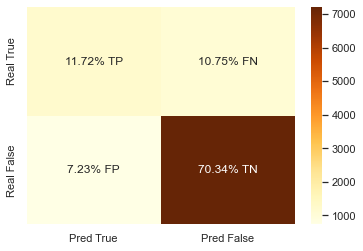

In [42]:
%%time
pred = nb_reg.predict(val_feat_r)
prob = nb_reg.predict_proba(val_feat_r)
score(val_targ_r,pred, prob[:,1])

In [43]:
pdf = score2('Reg','Regularizado',val_targ_r, pred, prob[:,1])
predictions = predictions.append( pdf )

### One Hot Encoding

In [44]:
if (runOhe):
    nb_ohe = GaussianNB()
    
    nb_ohe.fit(train_feat_ohe, train_targ_ohe)
    
    # Guardar
    if(saveOhe):
        dump(nb_ohe, 'models/NB/nb_r.sk') 
else:
    # Cargar
    nb_ohe = load('models/NB/nb_r.sk')

AUC-ROC: 0.7324909294946127
              precision    recall  f1-score   support

       False       0.88      0.67      0.76      7946
        True       0.37      0.67      0.48      2290

    accuracy                           0.67     10236
   macro avg       0.63      0.67      0.62     10236
weighted avg       0.76      0.67      0.70     10236

CONFUSION MATRIX
CPU times: user 297 ms, sys: 53 ms, total: 350 ms
Wall time: 324 ms


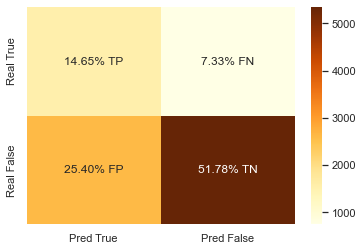

In [45]:
%%time
pred = nb_ohe.predict(val_feat_ohe)
prob = nb_ohe.predict_proba(val_feat_ohe)
score(val_targ_ohe,pred, prob[:,1])

In [46]:
pdf = score2('OHE','One Hot Encode',val_targ_ohe, pred, prob[:,1])
predictions = predictions.append( pdf )

### Hashing Trick

In [47]:
if (runHt):
    nb_ht = GaussianNB()
    
    nb_ht.fit(train_feat_ht, train_targ_ht)
    
    # Guardar
    if(saveHt):
        dump(nb_ht, 'models/NB/nb_ht.sk') 
else:
    # Cargar
    nb_ht = load('models/NB/nb_ht.sk')

AUC-ROC: 0.7988803792411001
              precision    recall  f1-score   support

       False       0.86      0.86      0.86      7946
        True       0.52      0.53      0.52      2290

    accuracy                           0.78     10236
   macro avg       0.69      0.69      0.69     10236
weighted avg       0.79      0.78      0.79     10236

CONFUSION MATRIX
CPU times: user 196 ms, sys: 25.7 ms, total: 221 ms
Wall time: 195 ms


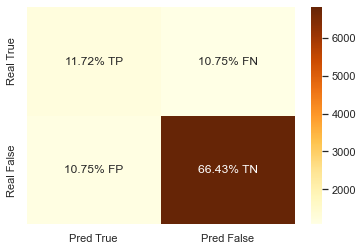

In [48]:
%%time
pred = nb_ht.predict(val_feat_ht)
prob = nb_ht.predict_proba(val_feat_ht)
score(val_targ_r,pred, prob[:,1])

In [49]:
pdf = score2('Reg','Regularizado',val_targ_r, pred, prob[:,1])
predictions = predictions.append( pdf )

## Resultados

In [50]:
predictions

,Modelo,Preprocesamientos,Clase,AUC-ROC,Accuracy,Precision,Recall,F1 score,Support
0,Reg,Regularizado,AVG,0.823272,0.823369,0.815212,0.823369,0.818171,10236
1,Reg,Regularizado,True,NaN,NaN,0.623463,0.531441,0.573786,2290
2,Reg,Regularizado,False,NaN,NaN,0.870473,0.907501,0.888601,7946
0,OHE,One Hot Encode,AVG,0.732491,0.673310,0.764647,0.673310,0.698796,10236
1,OHE,One Hot Encode,True,NaN,NaN,0.372767,0.674236,0.480100,2290
2,OHE,One Hot Encode,False,NaN,NaN,0.877585,0.673043,0.761823,7946
0,Reg,Regularizado,AVG,0.798880,0.784584,0.786441,0.784584,0.785488,10236
1,Reg,Regularizado,True,NaN,NaN,0.518124,0.530568,0.524272,2290
2,Reg,Regularizado,False,NaN,NaN,0.863769,0.857790,0.860769,7946
